In [1]:
import numpy as np
import pandas as pd
import scipy.special
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('digit-recognizer/train.csv')
test_data = pd.read_csv('digit-recognizer/test.csv')
sample_submission = pd.read_csv('digit-recognizer/sample_submission.csv')

# Data process

In [3]:
labels = train_data.iloc[:,0:1].values
train_data_without_labels = train_data.iloc[:,1:].values

In [4]:
#normalize data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_data_without_labels = sc.fit_transform(train_data_without_labels)

In [5]:
#hot encode classes
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
labels = ohe.fit_transform(labels).toarray()

In [6]:
from sklearn.model_selection import train_test_split

data_train, data_val, label_train, label_val = train_test_split(train_data_without_labels, labels, test_size = 0.01)

In [7]:
data_train = np.asfarray(data_train).reshape(len(data_train),28,28,1)
data_val = np.asfarray(data_val).reshape(len(data_val),28,28,1)

# Build network

In [8]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(Dense(65, activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten(input_shape=(data_train.shape[1:])))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 13, 13, 65)        4225      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        37504     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(data_train, label_train, validation_data = (data_val, label_val), epochs=6, batch_size=64)

Epoch 1/6
650/650 [==============================] - 61s 94ms/step - loss: 0.2376 - accuracy: 0.9247 - val_loss: 0.0727 - val_accuracy: 0.9786
Epoch 2/6
650/650 [==============================] - 61s 94ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0459 - val_accuracy: 0.9857
Epoch 3/6
650/650 [==============================] - 61s 94ms/step - loss: 0.0409 - accuracy: 0.9881 - val_loss: 0.0364 - val_accuracy: 0.9881
Epoch 4/6
650/650 [==============================] - 62s 95ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.0298 - val_accuracy: 0.9905
Epoch 5/6
650/650 [==============================] - 62s 96ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0305 - val_accuracy: 0.9929
Epoch 6/6
650/650 [==============================] - 62s 96ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0357 - val_accuracy: 0.9905


# Predictions

In [12]:
label_pred = model.predict(data_val)

pred = list()

for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

test = list()

for i in range(len(label_val)):
    test.append(np.argmax(label_val[i]))

In [13]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(pred, test)

print('Accuracy is {}\%'.format(acc*100))

Accuracy is 99.04761904761905\%


# Plot accuracy

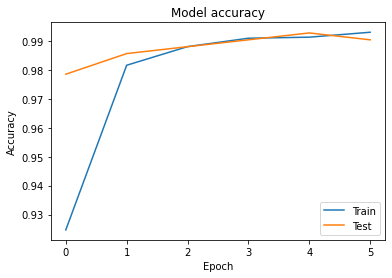

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

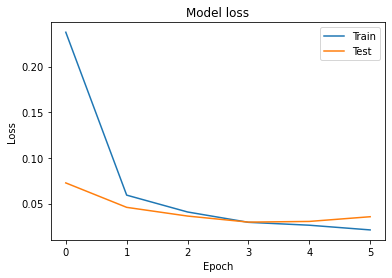

In [15]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

# Submit data

In [16]:
test_data = np.asfarray(test_data).reshape(len(test_data),28,28,1)

In [17]:
test_data_pred = model.predict(test_data)

pred = list()

for i in range(len(test_data_pred)):
    pred.append(np.argmax(test_data_pred[i]))

In [18]:
submission_data = []

for i in range(0, len(pred)):
    submission_data.append([i+1, pred[i]])

In [19]:
submit_net = pd.DataFrame(submission_data)
submit_net = submit_net.rename(columns={0: "ImageId", 1: "Label"})

In [20]:
submit_net.to_csv("submit_cnn.csv", index=False)